# 22AIE313 Computer Vision and Image processing
##  SkinColor
### Name : Guruprasath M R
### Roll : CH.EN.U4AIE22015


[ref](https://staff.fnwi.uva.nl/r.vandenboomgaard/IPCV20172018/20172018/LabExercises/SkinColorDetection.html)  
  
[<svg xmlns="http://www.w3.org/2000/svg" height="20" viewBox="0 0 16 16" width="20" aria-hidden="true" class="d-block"><path fill="currentColor" d="M8 0C3.58 0 0 3.58 0 8c0 3.54 2.29 6.53 5.47 7.59.4.07.55-.17.55-.38 0-.19-.01-.82-.01-1.49-2.01.37-2.53-.49-2.69-.94-.09-.23-.48-.94-.82-1.13-.28-.15-.68-.52-.01-.53.63-.01 1.08.58 1.23.82.72 1.21 1.87.87 2.33.66.07-.52.28-.87.51-1.07-1.78-.2-3.64-.89-3.64-3.95 0-.87.31-1.59.82-2.15-.08-.2-.36-1.02.08-2.12 0 0 .67-.21 2.2.82.64-.18 1.32-.27 2-.27.68 0 1.36.09 2 .27 1.53-1.04 2.2-.82 2.2-.82.44 1.1.16 1.92.08 2.12.51.56.82 1.27.82 2.15 0 3.07-1.87 3.75-3.65 3.95.29.25.54.73.54 1.48 0 1.07-.01 1.93-.01 2.2 0 .21.15.46.55.38A8.013 8.013 0 0016 8c0-4.42-3.58-8-8-8z"></path></svg>](https://github.com/gru13/Computer-Vision)

In [57]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegressionCV

In [58]:
img = cv2.imread("./dataset/SkinColor/FacePhoto/pg42RF.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

Timg = cv2.imread("./dataset/SkinColor/GroundT_FacePhoto/pg42RF.png")
Timg = cv2.cvtColor(Timg,cv2.COLOR_BGR2RGB)

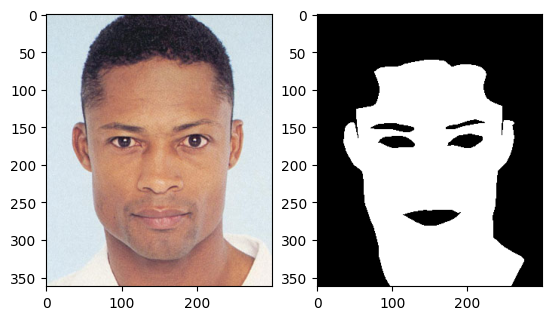

In [59]:
plt.subplot(122)
plt.imshow(Timg)
plt.subplot(121)
plt.imshow(img)

In [60]:
skincolors = img[Timg[:,:,0]==255]
nonskincolors = img[Timg[:,:,0]==0]

In [61]:
color = np.vstack((skincolors, nonskincolors))
target = np.concatenate((np.ones(len(skincolors)),np.zeros(len(nonskincolors))))

In [62]:
learn_color = color[1::2]
test_color = color[0::2]

learn_target = target[1::2]
test_target = target[0::2]

logregr = LogisticRegressionCV()
logregr.fit(learn_color, learn_target)

LogisticRegressionCV()

In [63]:
logregr.score(test_color, test_target)

0.9526335174953959

<function matplotlib.pyplot.show(close=None, block=None)>

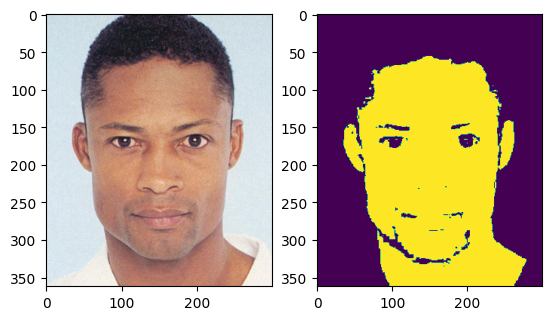

In [64]:
image_colors = img.reshape((-1,3))
predict_skin = logregr.predict(image_colors).reshape(img.shape[:2])
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(predict_skin)
plt.show